# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

# Reading in the Data

In [2]:
first_states = pd.read_csv('https://github.com/hemanth07mit/ml-project/blob/main/data/first_25_states.csv?raw=true')

In [3]:
last_states = pd.read_csv('https://github.com/hemanth07mit/ml-project/blob/main/data/last_25_states.csv?raw=true')

In [4]:
policies = pd.read_csv('https://github.com/hemanth07mit/ml-project/raw/main/data/policies.csv?raw=true')

In [5]:
first_states.head()

,subreddit,author,title,selftext,score,created_utc,state,eastern_time
0,CoronavirusAlabama,guarea,"After public apology, Montgomery councilman’s ...",NaN,1,1593606973,alabama,2020-07-01 08:36:13
1,CoronavirusAlabama,guarea,University of Alabama graduate tells his COVID...,NaN,1,1593607132,alabama,2020-07-01 08:38:52
2,CoronavirusAlabama,guarea,Tuscaloosa adopts face mask law for public spaces,NaN,1,1593608257,alabama,2020-07-01 08:57:37
3,CoronavirusAlabama,guarea,Coin shortage due to coronavirus: What’s happe...,NaN,0,1593615060,alabama,2020-07-01 10:51:00
4,CoronavirusAlabama,houyam-love,[Study Results] How is Coronavirus Pandemic Af...,NaN,1,1593621148,alabama,2020-07-01 12:32:28


In [6]:
first_states.shape

(5755, 8)

In [7]:
last_states.head()

,subreddit,author,title,selftext,score,created_utc,state,eastern_time
0,CoronavirusMontana,janeemarii,Montana Coronavirus Report | Montana Free Press,NaN,1,1594334770,montana,2020-07-09 16:46:10
1,CoronavirusMontana,janeemarii,Montana's Covid-19 Testing Information,NaN,1,1594502716,montana,2020-07-11 15:25:16
2,CoronavirusMontana,theeaglesfamski,Bullock announces mask requirements,NaN,1,1594846455,montana,2020-07-15 14:54:15
3,CoronavirusMontana,janeemarii,Helena High summer school goes online after st...,NaN,9,1595295829,montana,2020-07-20 19:43:49
4,CoronavirusMontana,BrightscapesArt,Art Project: Having Fun During Coronavirus,NaN,1,1595939075,montana,2020-07-28 06:24:35


In [8]:
last_states.shape

(4084, 8)

# Data Cleaning and EDA for Reddit

In [9]:
df = pd.concat([first_states, last_states])

In [10]:
df.reset_index(drop = True, inplace=True)

In [11]:
df.shape

(9839, 8)

In [12]:
df.isna().sum()

subreddit          0
author             0
title              0
selftext        6505
score              0
created_utc        0
state              0
eastern_time       0
dtype: int64

In [13]:
def clean_title(title_cell):
    if title_cell == '[removed]':
        return np.nan
    elif title_cell == '[deleted]':
        return np.nan
    else:
        return title_cell

In [14]:
df['title'] = df['title'].map(clean_title)

In [15]:
df.isna().sum()

subreddit          0
author             0
title              0
selftext        6505
score              0
created_utc        0
state              0
eastern_time       0
dtype: int64

In [16]:
df['state'].value_counts()

texas                   1300
arizona                  900
california               900
georgia                  700
michigan                 600
washington               580
colorado                 500
alabama                  400
massachusetts            400
illinois                 400
louisianna               400
pennsylvania             280
tennessee                260
new_mexico               225
ohio                     200
florida                  200
wisconsin                200
new_york                 196
oklahoma                 190
utah                     140
oregon                   120
south_carolina           100
minnesota                100
kentucky                 100
rhode_island              80
virginia                  80
indiana                   75
north_carolina            70
west_virginia             15
maine                     15
hawaii                    15
nevada                    13
district_of_columbia      11
missouri                  10
arkansas      

In [17]:
len(df['state'].unique())

49

In [18]:
df['state'].replace('conneticut', 'connecticut', inplace=True)

In [19]:
df['state'].replace('louisianna', 'louisiana', inplace=True)

In [20]:
# df.to_csv('./data/reddit_states.csv', index=False)

## Data Visualization

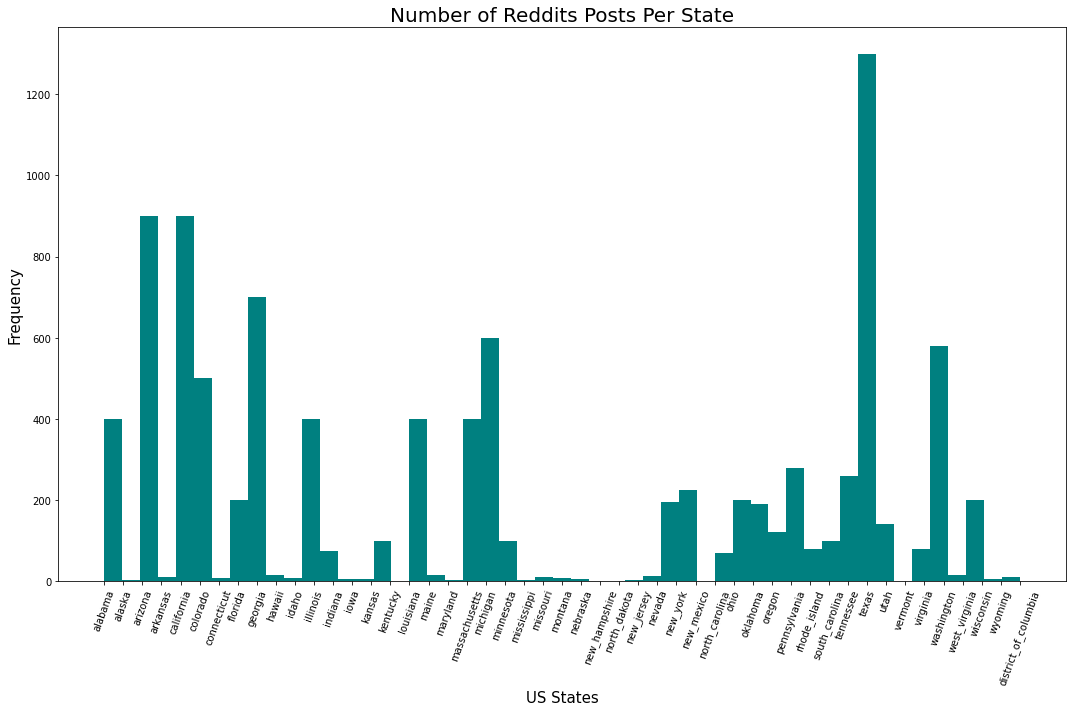

In [21]:
plt.figure(figsize = (15, 10))
plt.hist(df['state'], bins = 51, color = 'teal')
plt.title('Number of Reddits Posts Per State', fontsize = 20)
plt.xlabel('US States', fontsize = 15)
plt.xticks(rotation = 70)
plt.ylabel('Frequency', fontsize = 15)
plt.tight_layout();

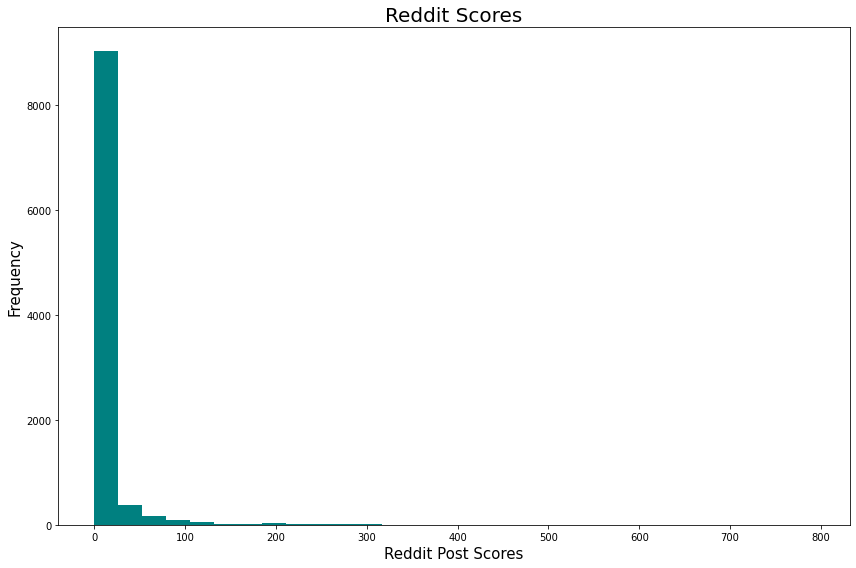

In [22]:
plt.figure(figsize = (12, 8))
plt.hist(df['score'], bins = 30, color = 'teal')
plt.title('Reddit Scores', fontsize = 20)
plt.xlabel('Reddit Post Scores', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.tight_layout();

In [23]:
df[df['score'] > 500]

,subreddit,author,title,selftext,score,created_utc,state,eastern_time
1859,CoronavirusCA,joyousjoyness,Mirror,NaN,792,1595181283,california,2020-07-19 13:54:43
1865,CoronavirusCA,Accomplished_Thanks,California Gov. Gavin Newsom reportedly had to...,NaN,773,1595195622,california,2020-07-19 17:53:42
1884,CoronavirusCA,el_chupanebriated,I risked my life yesterday to show yall how Hu...,NaN,546,1595261875,california,2020-07-20 12:17:55
1897,CoronavirusCA,OTGASTD,Orange County Humor,NaN,754,1595298181,california,2020-07-20 22:23:01
1977,CoronavirusCA,Lostones1117,‘We have lost control of this fight.’ Californ...,NaN,509,1595540841,california,2020-07-23 17:47:21
8098,CoronaVirusTX,Can_I_Nap_Now,Texas: Where everyone on the road pulls over w...,NaN,595,1594755866,texas,2020-07-14 13:44:26
8295,CoronaVirusTX,happysnappah,Nurse in McAllen describes less than ideal con...,NaN,679,1595208676,texas,2020-07-19 19:31:16
8309,CoronaVirusTX,poweroverpain,TX teacher here near a major hotspot. we final...,NaN,677,1595253716,texas,2020-07-20 08:01:56
8361,CoronaVirusTX,adidasnmotion,NBC 5 found more than 430 babies have tested p...,NaN,540,1595356557,texas,2020-07-21 12:35:57
8438,CoronaVirusTX,AintEverLucky,Woman who invited Gov. Abbott to her mother's ...,NaN,608,1595539513,texas,2020-07-23 15:25:13


## Word Counts

In [24]:
df['word_count'] = [len(df['title'][i].split()) for i in range(0, len(df['title']))]

In [25]:
df.head()

,subreddit,author,title,selftext,score,created_utc,state,eastern_time,word_count
0,CoronavirusAlabama,guarea,"After public apology, Montgomery councilman’s ...",NaN,1,1593606973,alabama,2020-07-01 08:36:13,14
1,CoronavirusAlabama,guarea,University of Alabama graduate tells his COVID...,NaN,1,1593607132,alabama,2020-07-01 08:38:52,8
2,CoronavirusAlabama,guarea,Tuscaloosa adopts face mask law for public spaces,NaN,1,1593608257,alabama,2020-07-01 08:57:37,8
3,CoronavirusAlabama,guarea,Coin shortage due to coronavirus: What’s happe...,NaN,0,1593615060,alabama,2020-07-01 10:51:00,11
4,CoronavirusAlabama,houyam-love,[Study Results] How is Coronavirus Pandemic Af...,NaN,1,1593621148,alabama,2020-07-01 12:32:28,9


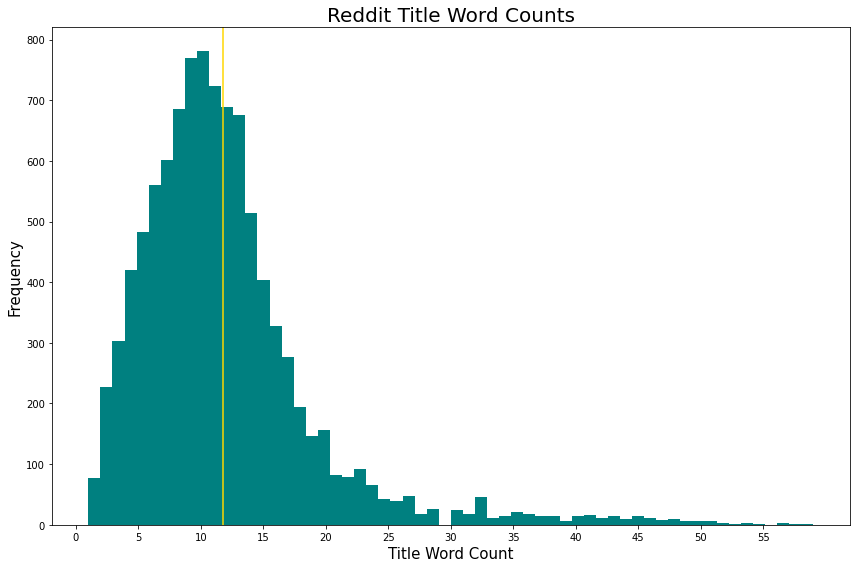

In [26]:
plt.figure(figsize = (12, 8))
plt.hist(df['word_count'], bins = 60, color = 'teal')
plt.title('Reddit Title Word Counts', fontsize = 20)
plt.xlabel('Title Word Count', fontsize = 15)
plt.xticks(np.arange(0, max(df['word_count']), 5))
plt.ylabel('Frequency', fontsize = 15)
plt.axvline(df['word_count'].mean(), color = 'gold')
plt.tight_layout();

In [27]:
height = [df.groupby('state')['word_count'].mean()[i] for i in range(0, len(df.groupby('state')['word_count'].mean()))]

In [28]:
height[0:5]

[10.8075, 7.0, 11.575555555555555, 12.7, 12.376666666666667]

In [29]:
df.groupby('state')['word_count'].mean().head()

state
alabama       10.807500
alaska         7.000000
arizona       11.575556
arkansas      12.700000
california    12.376667
Name: word_count, dtype: float64

In [30]:
df['state'].sort_values().unique()

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'district_of_columbia', 'florida',
       'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa',
       'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'mississippi',
       'missouri', 'montana', 'nebraska', 'nevada', 'new_hampshire',
       'new_jersey', 'new_mexico', 'new_york', 'north_carolina',
       'north_dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhode_island', 'south_carolina', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'west_virginia', 'wisconsin',
       'wyoming'], dtype=object)

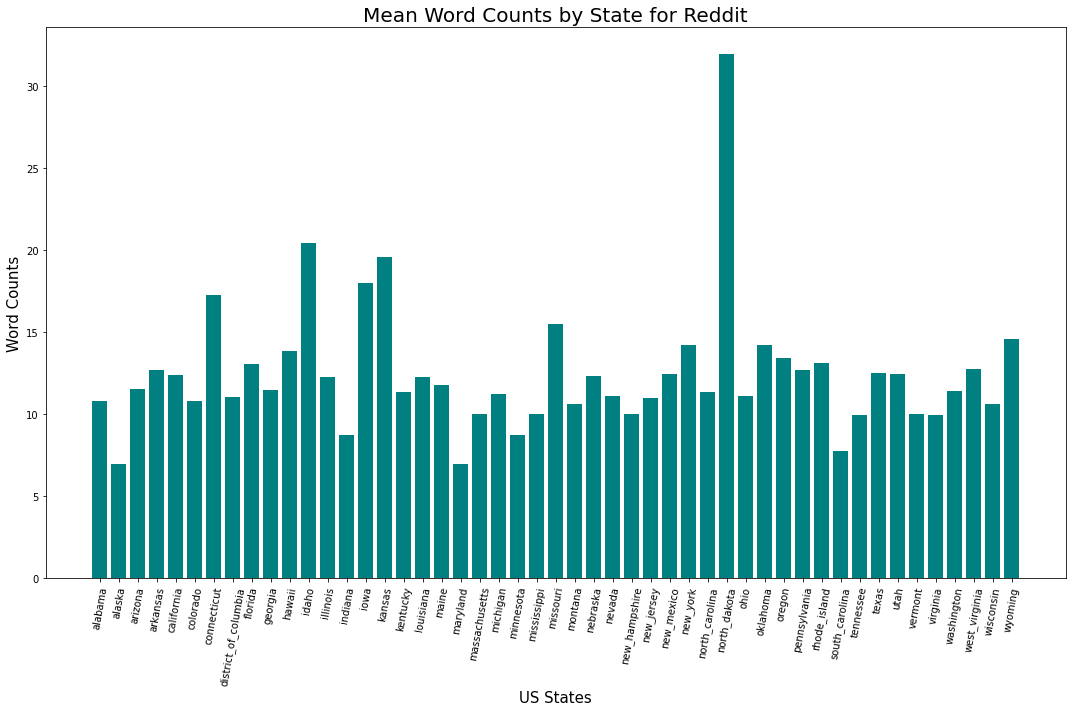

In [31]:
plt.figure(figsize = (15, 10))
plt.bar(df['state'].sort_values().unique(), height, color = 'teal')
plt.title('Mean Word Counts by State for Reddit', fontsize = 20)
plt.xlabel('US States', fontsize = 15)
plt.xticks(rotation = 80)
plt.ylabel('Word Counts', fontsize = 15)
plt.tight_layout();

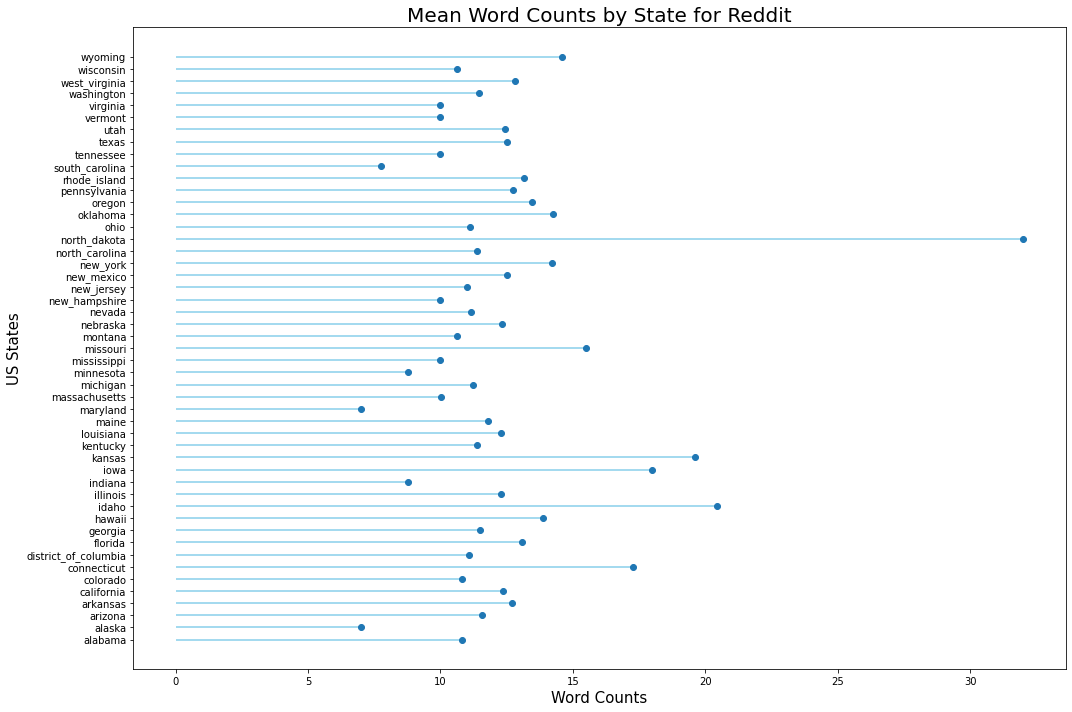

In [32]:
plt.figure(figsize = (15, 10))
plt.hlines(y=df['state'].sort_values().unique(), xmin=0, xmax=height, color='skyblue')
plt.plot(height, df['state'].sort_values().unique(), "o")
plt.title('Mean Word Counts by State for Reddit', fontsize = 20)
plt.ylabel('US States', fontsize = 15)
plt.xlabel('Word Counts', fontsize = 15)
plt.tight_layout();


## Frequently Used Words Using CountVectorizer

In [33]:
cvec = CountVectorizer(stop_words = 'english')

In [34]:
X = df['title']

In [35]:
Z_title = cvec.fit_transform(X)

In [36]:
Z_title_df = pd.DataFrame(Z_title.toarray(), columns = cvec.get_feature_names())
Z_title_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0009018,000s,009,00pm,01,015,016,017,...,معاناة,معلومات,مفيدة,من,موبايلات,ميديا,واجهزة,وتثبيت,وداع,وفاة
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Code adapted from global lect: NLP II

top_words = {}

for i in Z_title_df.columns:
    top_words[i] = Z_title_df[i].sum()
    
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

In [38]:
most_freq.head(10)

,0,1
0,covid,2513
1,19,1900
2,cases,1336
3,coronavirus,1275
4,new,1190
5,july,749
6,deaths,712
7,county,694
8,mask,684
9,school,538


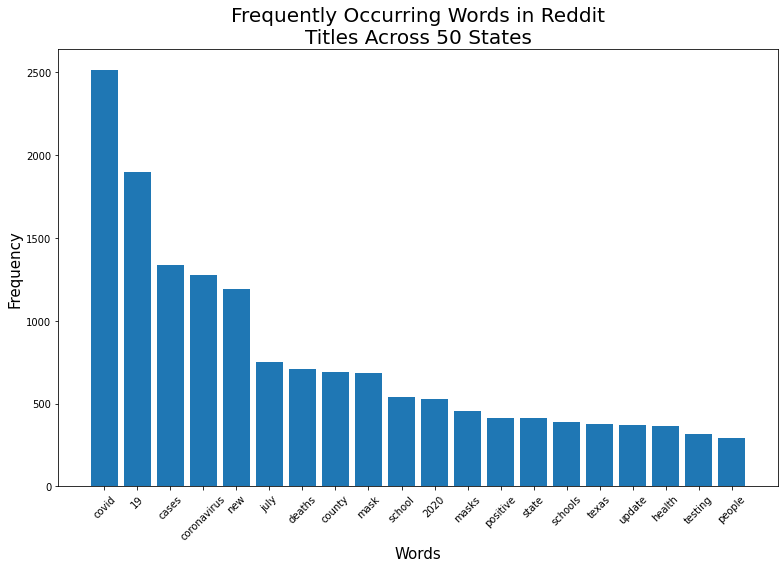

In [39]:
# Code adapted from global lect: NLP II

plt.figure(figsize = (11, 8))

plt.bar(most_freq[0][:20], most_freq[1][:20])
plt.title("Frequently Occurring Words in Reddit\nTitles Across 50 States", fontsize = 20)
plt.xlabel("Words", fontsize = 15)
plt.xticks(rotation = 45)
plt.ylabel("Frequency", fontsize = 15)
plt.tight_layout();

### Bi-grams

In [40]:
cvec_bigram = CountVectorizer(stop_words = 'english', ngram_range = (2,2))

In [41]:
Z_bigram = cvec_bigram.fit_transform(X)

In [42]:
Z_bigram_df = pd.DataFrame(Z_bigram.toarray(), columns = cvec_bigram.get_feature_names())
Z_bigram_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00 pm,000 111,000 15,000 73,000 80,000 active,000 attendance,000 attendees,000 case,000 cases,...,معاناة وداع,معلومات مفيدة,مفيدة الاول,من قبل,موبايلات خرافية,ميديا فاير,واجهزة الموبيل,وتثبيت اقوى,وداع رجاء,وفاة الفنانة
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Code adapted from global lect: NLP II

top_words = {}

for i in Z_bigram_df.columns:
    top_words[i] = Z_bigram_df[i].sum()
    
most_freq_bigram = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

In [44]:
most_freq_bigram.head(10)

,0,1
0,covid 19,1834
1,19 cases,314
2,new cases,277
3,coronavirus cases,154
4,daily discussion,148
5,new deaths,128
6,new covid,113
7,positive covid,111
8,mask mandate,110
9,health officials,107


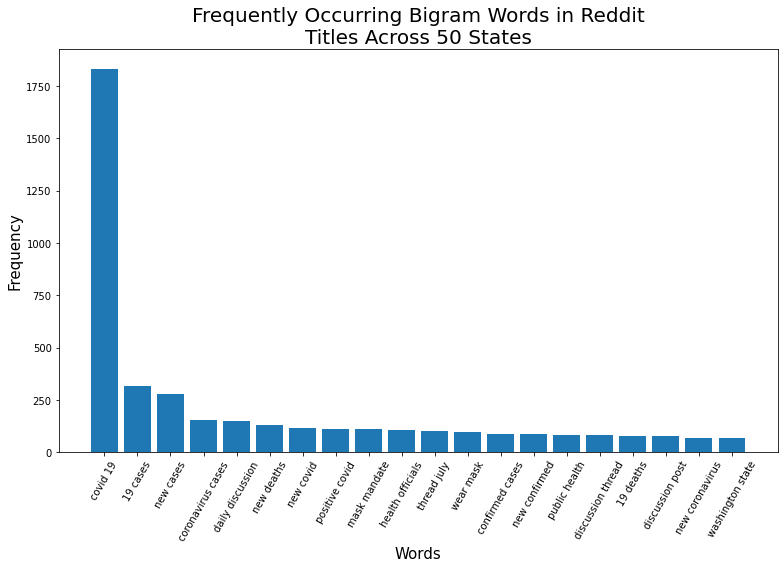

In [45]:
# Code adapted from global lect: NLP II

plt.figure(figsize = (11, 8))

plt.bar(most_freq_bigram[0][:20], most_freq_bigram[1][:20])
plt.title("Frequently Occurring Bigram Words in Reddit\nTitles Across 50 States", fontsize = 20)
plt.xlabel("Words", fontsize = 15)
plt.xticks(rotation = 60)
plt.ylabel("Frequency", fontsize = 15)
plt.tight_layout();

# Data Cleaning and EDA for Twitter

In [46]:
twitter = pd.read_csv('https://github.com/hemanth07mit/ml-project/blob/main/data/twitter_july_df.csv?raw=true')

In [47]:
twitter.shape

(19756, 13)

In [48]:
twitter.head()

,coordinates,created_at,hashtags,favorite_count,id,lang,place,retweet_count,text,user_followers_count,user_location,user_verified,state
0,"-122.419,37.7793",Tue Jul 21 04:45:01 +0000 2020,NaN,0,1285435588548669441,en,"San Francisco, CA",0,What do you wear for a Summer dinner in San Fr...,1659,San Francisco,False,CA
1,"-87.6587039,41.9272579",Tue Jul 21 06:03:38 +0000 2020,summer2020 phase3 summerhaircut vibin morethan...,0,1285455375559352320,en,"Chicago, IL",0,"𝟞.𝟚𝟠.𝟚𝟘𝟚𝟘 ""𝕟𝕖𝕨"" 𝕙𝕒𝕚𝕣 𝕕𝕠𝕟'𝕥 𝕔𝕒𝕣𝕖 🖤\n.\n.\n.\n#s...",372,"Chicago, IL",False,IL
2,"-117.89719,33.81864",Tue Jul 21 04:36:24 +0000 2020,theranch birthday tomato heirloomtomatoes file...,0,1285433422836531202,en,"Anaheim, CA",0,Glad @theranchanaheim didn’t let Covid stop th...,535,"Lake Forest, CA",False,CA
3,"-123.087,44.0519",Tue Jul 21 04:54:32 +0000 2020,customcanoe handcraftedcanoe quarantine Quaran...,0,1285437985350189057,en,"Eugene, OR",0,Mellow Monday\n.\nMarvels of the majestic moti...,88,"Eugene, OR",False,OR
4,"-87.66902,41.94131",Tue Jul 21 06:03:29 +0000 2020,summer2020 covid19 phase3 summernails vibin,0,1285455336955150336,en,"Chicago, IL",0,🌳ℐ 𝓁𝑜𝓋𝑒 𝑜𝓊𝓇 𝓃𝑒𝓌 𝓃𝑒𝒾𝑔𝒽𝒷𝑜𝓇𝒽𝑜𝑜𝒹\n💛💙💚🤎🧡\n.\n.\n.\n...,372,"Chicago, IL",False,IL


In [49]:
twitter_cols = ['text', 'favorite_count', 'retweet_count','state', 'created_at']

In [50]:
twitter = twitter[twitter_cols].copy()

In [51]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19756 entries, 0 to 19755
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            19756 non-null  object
 1   favorite_count  19756 non-null  int64 
 2   retweet_count   19756 non-null  int64 
 3   state           19756 non-null  object
 4   created_at      19756 non-null  object
dtypes: int64(2), object(3)
memory usage: 771.8+ KB


In [52]:
twitter['state'].value_counts()

CA    3983
NY    2972
FL    1634
TX    1574
GA     722
IL     582
NJ     514
PA     489
DC     456
NC     410
MD     408
OH     386
VA     384
MA     362
WA     342
AZ     293
TN     284
NV     270
MI     270
OR     265
IN     246
CO     229
SC     212
MN     179
WI     178
HI     176
MO     176
LA     175
AL     168
CT     137
KY     118
KS     110
UT      97
OK      94
DE      72
AR      71
NM      71
RI      61
ME      56
NH      53
ID      53
MT      51
NE      51
IA      50
MS      43
SD      43
WV      40
VT      36
PR      28
AK      24
VI      21
ND      15
WY      15
GU       6
PW       1
Name: state, dtype: int64

In [53]:
twitter.drop(twitter[twitter['state'] == 'GU'].index, inplace=True)

In [54]:
twitter.drop(twitter[twitter['state'] == 'PW'].index, inplace=True)

In [55]:
twitter.drop(twitter[twitter['state'] == 'PR'].index, inplace = True)

In [56]:
twitter.drop(twitter[twitter['state'] == 'VI'].index, inplace=True)

In [57]:
twitter.shape

(19700, 5)

In [58]:
twitter.reset_index(drop=True, inplace = True)

## Data Visualization

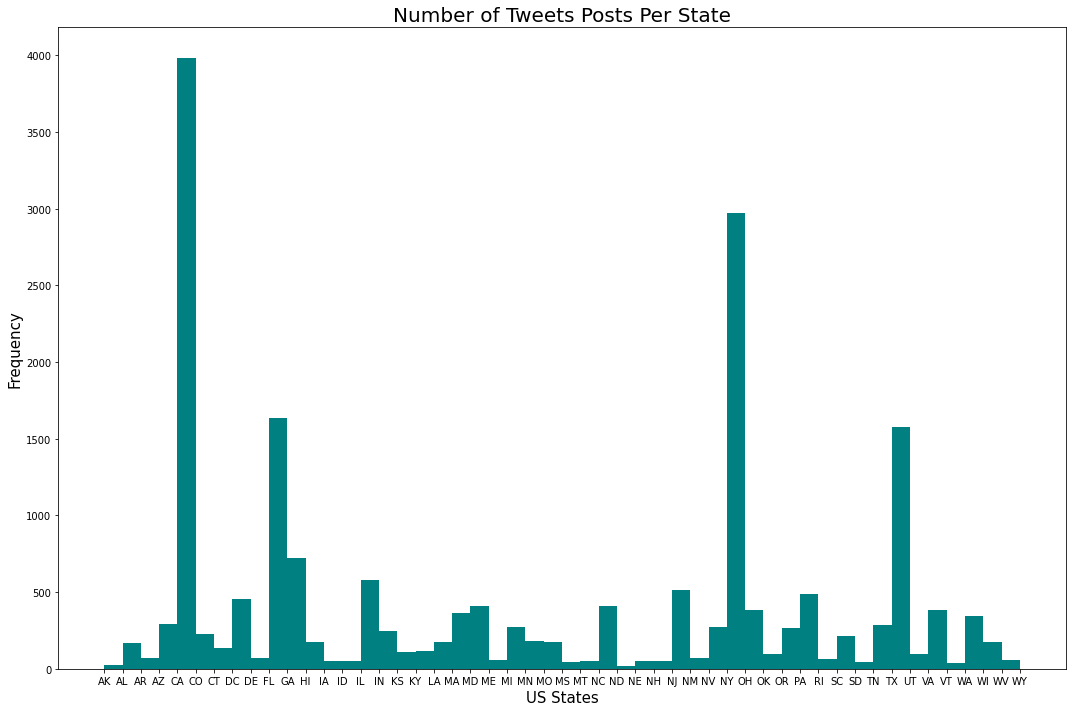

In [59]:
plt.figure(figsize = (15, 10))
plt.hist(twitter['state'].sort_values(), bins = 50, color = 'teal')
plt.title('Number of Tweets Posts Per State', fontsize = 20)
plt.xlabel('US States', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.tight_layout();

In [60]:
twitter['stripped_text'] = twitter['text'].replace('\nhttp\S+', '', regex=True).replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('\n\n\S+', '', regex=True).replace('\n\S+', '', regex=True)

In [61]:
twitter.head()

,text,favorite_count,retweet_count,state,created_at,stripped_text
0,What do you wear for a Summer dinner in San Fr...,0,0,CA,Tue Jul 21 04:45:01 +0000 2020,What do you wear for a Summer dinner in San Fr...
1,"𝟞.𝟚𝟠.𝟚𝟘𝟚𝟘 ""𝕟𝕖𝕨"" 𝕙𝕒𝕚𝕣 𝕕𝕠𝕟'𝕥 𝕔𝕒𝕣𝕖 🖤\n.\n.\n.\n#s...",0,0,IL,Tue Jul 21 06:03:38 +0000 2020,"𝟞.𝟚𝟠.𝟚𝟘𝟚𝟘 ""𝕟𝕖𝕨"" 𝕙𝕒𝕚𝕣 𝕕𝕠𝕟'𝕥 𝕔𝕒𝕣𝕖 🖤 #🖕🏼covid19 #..."
2,Glad @theranchanaheim didn’t let Covid stop th...,0,0,CA,Tue Jul 21 04:36:24 +0000 2020,Glad @theranchanaheim didn’t let Covid stop th...
3,Mellow Monday\n.\nMarvels of the majestic moti...,0,0,OR,Tue Jul 21 04:54:32 +0000 2020,Mellow Monday of the majestic motions afloat w...
4,🌳ℐ 𝓁𝑜𝓋𝑒 𝑜𝓊𝓇 𝓃𝑒𝓌 𝓃𝑒𝒾𝑔𝒽𝒷𝑜𝓇𝒽𝑜𝑜𝒹\n💛💙💚🤎🧡\n.\n.\n.\n...,0,0,IL,Tue Jul 21 06:03:29 +0000 2020,🌳ℐ 𝓁𝑜𝓋𝑒 𝑜𝓊𝓇 𝓃𝑒𝓌 𝓃𝑒𝒾𝑔𝒽𝒷𝑜𝓇𝒽𝑜𝑜𝒹 #covid19 #phase3 ...


In [62]:
twitter['word_count'] = [len(twitter['stripped_text'][i].split()) for i in range(0, len(twitter['stripped_text']))]

In [63]:
height_twit = [twitter.groupby('state')['word_count'].mean()[i] for i in range(0, len(twitter.groupby('state')['word_count'].mean()))]
height_twit[0:5]

[26.791666666666668,
 28.952380952380953,
 26.859154929577464,
 25.914675767918087,
 26.160682902334923]

## Word Counts

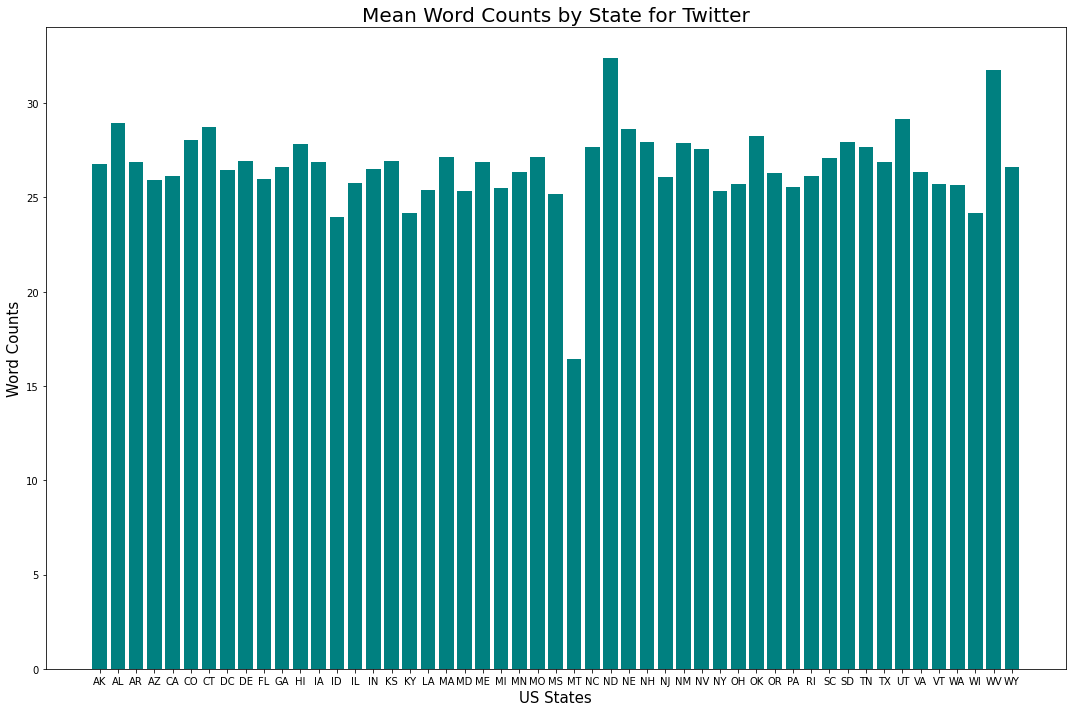

In [64]:
plt.figure(figsize = (15, 10))
plt.bar(twitter['state'].sort_values().unique(), height_twit, color = 'teal')
plt.title('Mean Word Counts by State for Twitter', fontsize = 20)
plt.xlabel('US States', fontsize = 15)
plt.ylabel('Word Counts', fontsize = 15)
plt.tight_layout();

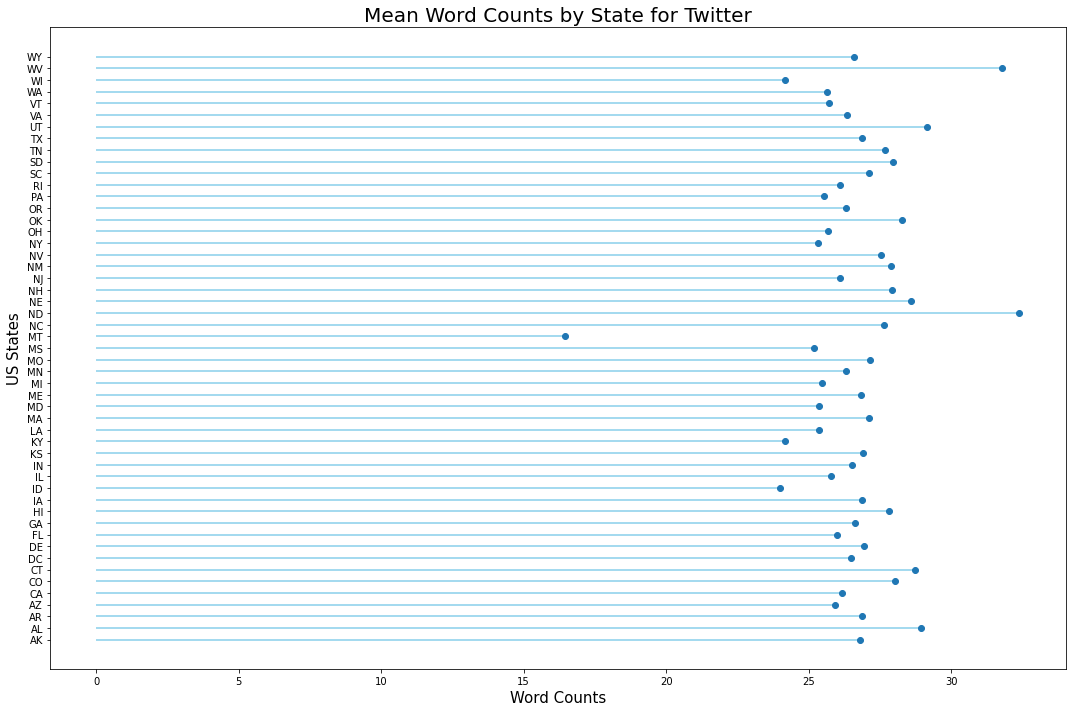

In [65]:
plt.figure(figsize = (15, 10))
plt.hlines(y=twitter['state'].sort_values().unique(), xmin=0, xmax=height_twit, color='skyblue')
plt.plot(height_twit, twitter['state'].sort_values().unique(), "o")
plt.title('Mean Word Counts by State for Twitter', fontsize = 20)
plt.ylabel('US States', fontsize = 15)
plt.xlabel('Word Counts', fontsize = 15)
plt.tight_layout();